# Proyek Analisis Data: Air Quality Dataset - Huairou Station
- **Nama:** Istia Budi
- **Email:** istiabudi@gmail.com
- **ID Dicoding:** istiabudi73

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi materi partikulat PM(2.5) dan PM(10) yang dimonitoring pada stasiun Huairou.
- Apakah jam sibuk mempengaruhi polusi udara dibanding tengah malam.
- Apakah hujan (RAIN) memiliki efek dalam mengurangi polusi udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
huairou_df = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
huairou_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


**Insight:**
- [Air Quality Dataset](https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view) adalah kumpulan data tentang polusi udara di Beijing, China, yang dikumpulkan dari berbagai stasiun pemantauan kualitas udara. Pada proyek ini data hasil pemantauan kualitas udara yang berasal dari stasiun Huairou akan digunakan untuk melakukan analisis data.
- Pemantauan kualitas udara dilakukan dalam rentang 1 Maret 2013 hingga 28 Februari 2017.
- Dataset ini memiliki 35064 baris dan 18 kolom.

### Assessing Data

In [3]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Cleaning Data

Check missing values

In [4]:
huairou_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


Remove missing values

In [5]:
huaioru_df = huairou_df.dropna()
len(huaioru_df)

31708

Check duplication data

In [6]:
huairou_df.duplicated().sum()

0

Check parameter statistik

In [7]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Check outlier

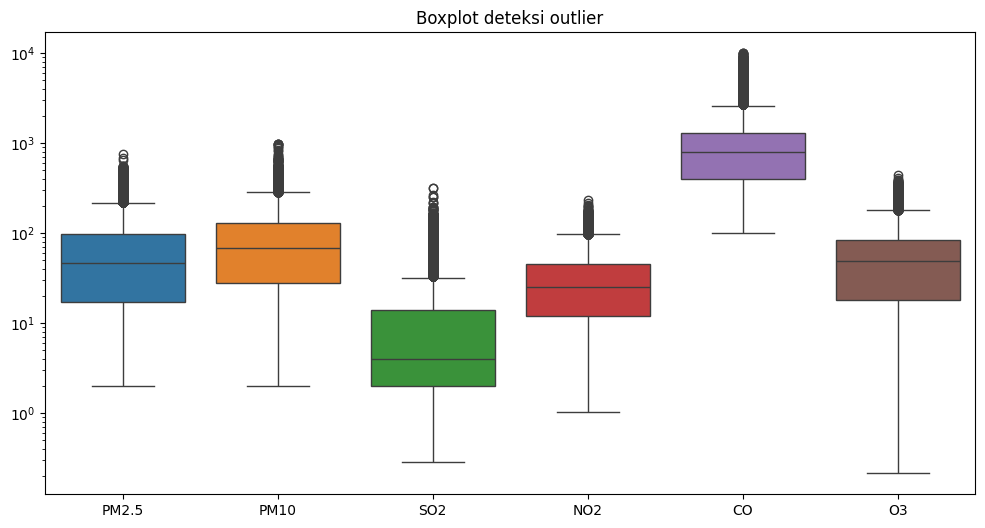

In [8]:
column_to_check = huairou_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=column_to_check)
plt.yscale('log')
plt.title('Boxplot deteksi outlier')
plt.show()

Remove outlier dengan IQR (Interquantile Range)

In [9]:
for col in column_to_check:
    Q1 = huairou_df[col].quantile(0.25)
    Q3 = huairou_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    huairou_df = huairou_df[(huairou_df[col] >= lower_bound) & (huairou_df[col] <= upper_bound)]

huairou_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
5,6,2013,3,1,5,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou
7,8,2013,3,1,7,3.0,10.0,13.0,13.0,400.0,71.0,-2.7,1024.3,-23.2,0.0,NNE,3.4,Huairou
10,11,2013,3,1,10,19.0,32.0,5.0,3.0,300.0,85.0,1.0,1025.1,-23.6,0.0,ESE,2.7,Huairou
12,13,2013,3,1,12,3.0,6.0,5.0,3.0,300.0,86.0,3.9,1023.8,-21.3,0.0,W,1.9,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


In [10]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23910.000000,23909.000000,23909.000000,23907.000000,23913.000000
mean,18780.477310,2014.790089,6.702000,15.729971,11.047468,46.123346,63.760773,5.806642,23.896368,727.229658,55.766141,13.023169,1007.470730,2.732686,0.075861,1.699214
std,9819.190499,1.159978,3.287385,8.768638,6.997903,42.366048,50.786702,5.898856,17.128697,452.239049,39.597288,11.412879,10.081351,14.616371,0.862517,1.248732
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,11040.000000,2014.000000,4.000000,8.000000,5.000000,14.000000,22.000000,2.000000,10.000000,400.000000,24.000000,3.500000,999.200000,-10.500000,0.000000,0.900000
50%,19398.000000,2015.000000,7.000000,16.000000,10.000000,32.000000,50.000000,3.000000,20.000000,600.000000,52.000000,14.975000,1006.900000,4.500000,0.000000,1.300000
75%,27320.000000,2016.000000,9.000000,23.000000,17.000000,67.000000,94.000000,7.000000,34.000000,1000.000000,80.000000,22.400000,1015.400000,16.200000,0.000000,2.100000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,219.000000,259.000000,27.000000,76.000000,2100.000000,177.000000,38.500000,1036.500000,29.100000,45.900000,11.800000


**Insight:**
- Terdapat 3356 baris data yang memiliki data kosong. Karena datanya 35064 jadi perubahan datanya tidak terlalu signifikan
- Tidak ada data duplikasi pada dataset ini
- Membersihkan outlier pada kolom PM2.5, PM10, SO2, NO2, CO, O3 karena banyaknya data tidak wajar.

In [11]:
huaioru_df.to_csv('data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Eksplorasi Data Stasiun Huairou

Statistik Deskriptif

In [12]:
huairou_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23953.000000,23910.000000,23909.000000,23909.000000,23907.000000,23722,23913.000000,23953
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3537,NaN,23953
mean,18780.477310,2014.790089,6.702000,15.729971,11.047468,46.123346,63.760773,5.806642,23.896368,727.229658,55.766141,13.023169,1007.470730,2.732686,0.075861,NaN,1.699214,NaN
std,9819.190499,1.159978,3.287385,8.768638,6.997903,42.366048,50.786702,5.898856,17.128697,452.239049,39.597288,11.412879,10.081351,14.616371,0.862517,NaN,1.248732,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,NaN,0.000000,NaN
25%,11040.000000,2014.000000,4.000000,8.000000,5.000000,14.000000,22.000000,2.000000,10.000000,400.000000,24.000000,3.500000,999.200000,-10.500000,0.000000,NaN,0.900000,NaN
50%,19398.000000,2015.000000,7.000000,16.000000,10.000000,32.000000,50.000000,3.000000,20.000000,600.000000,52.000000,14.975000,1006.900000,4.500000,0.000000,NaN,1.300000,NaN
75%,27320.000000,2016.000000,9.000000,23.000000,17.000000,67.000000,94.000000,7.000000,34.000000,1000.000000,80.000000,22.400000,1015.400000,16.200000,0.000000,NaN,2.100000,NaN


Check distribusi data

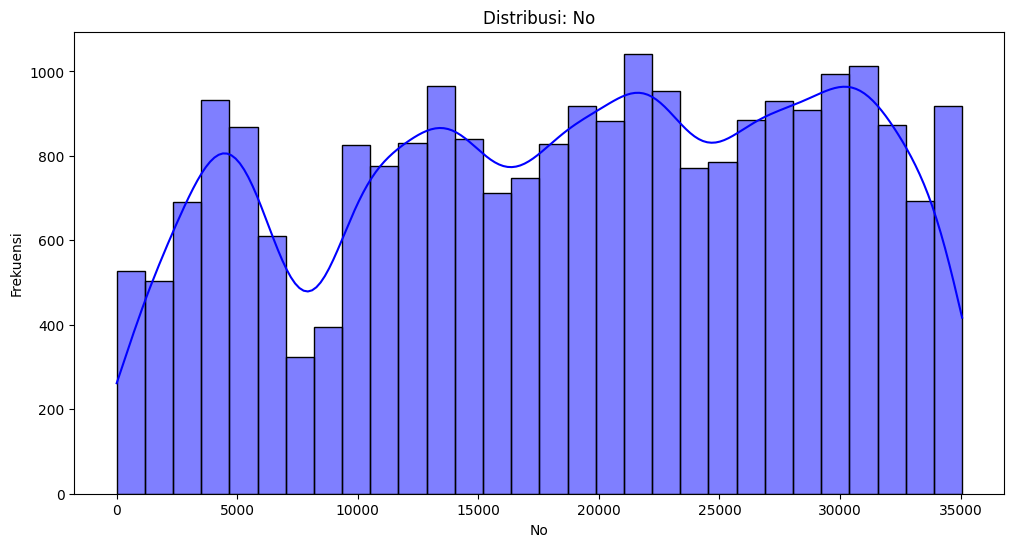

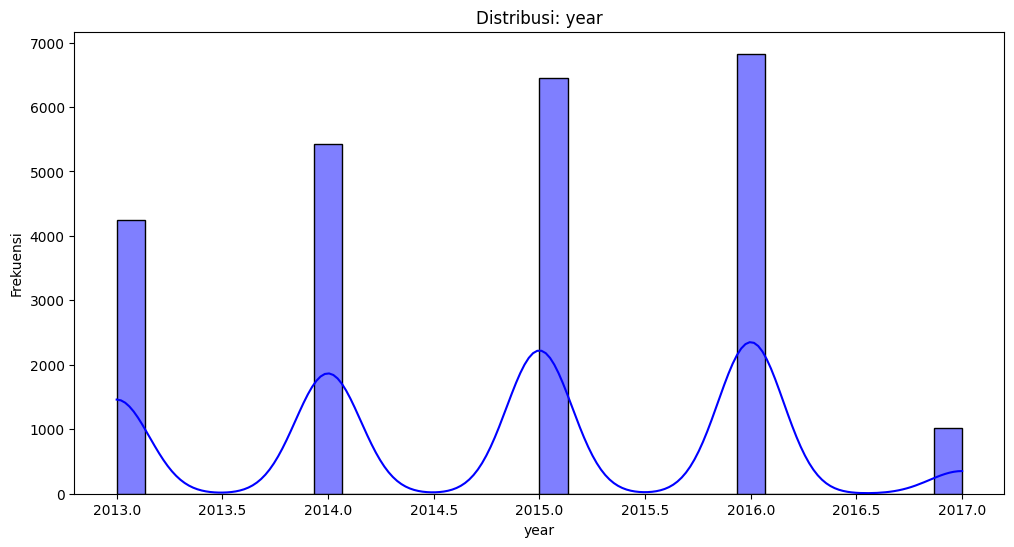

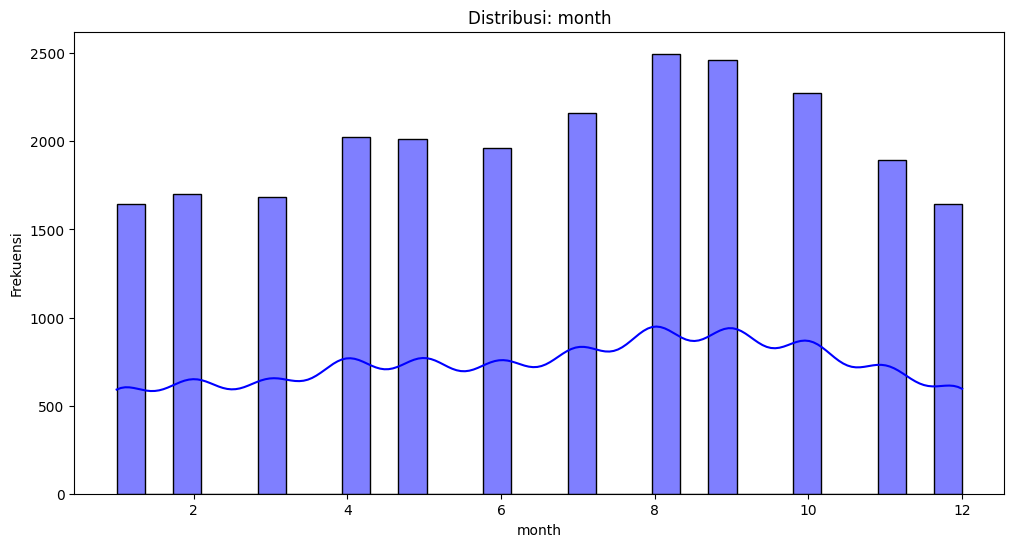

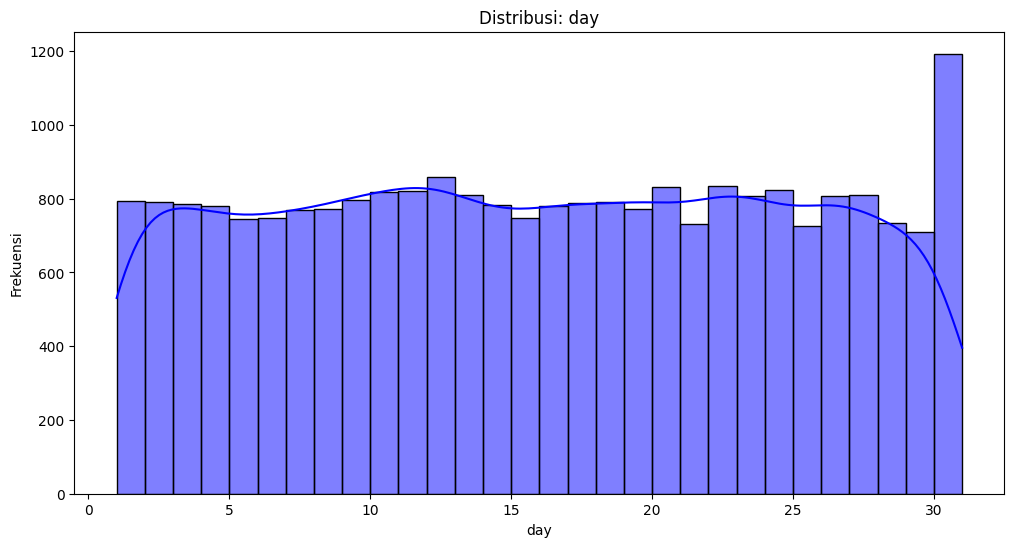

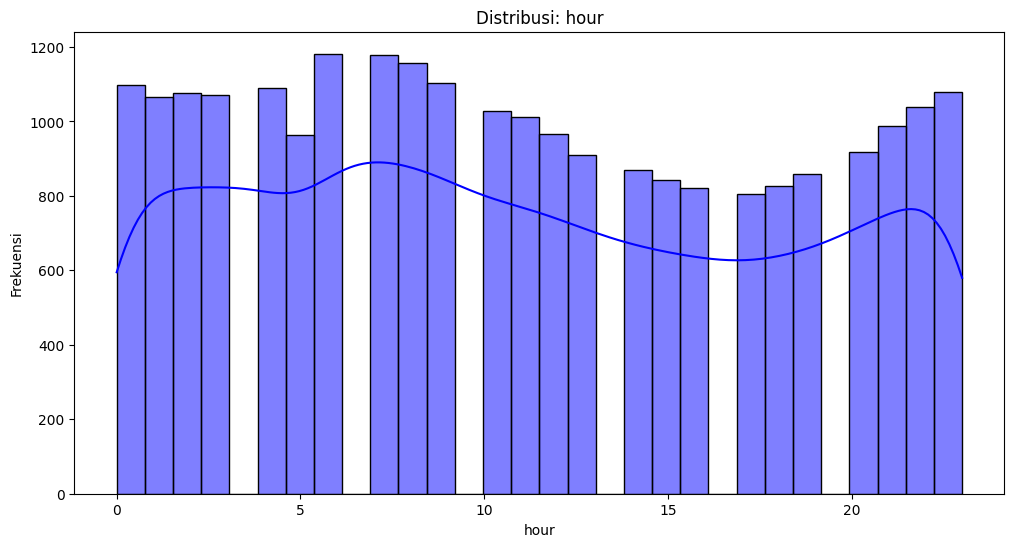

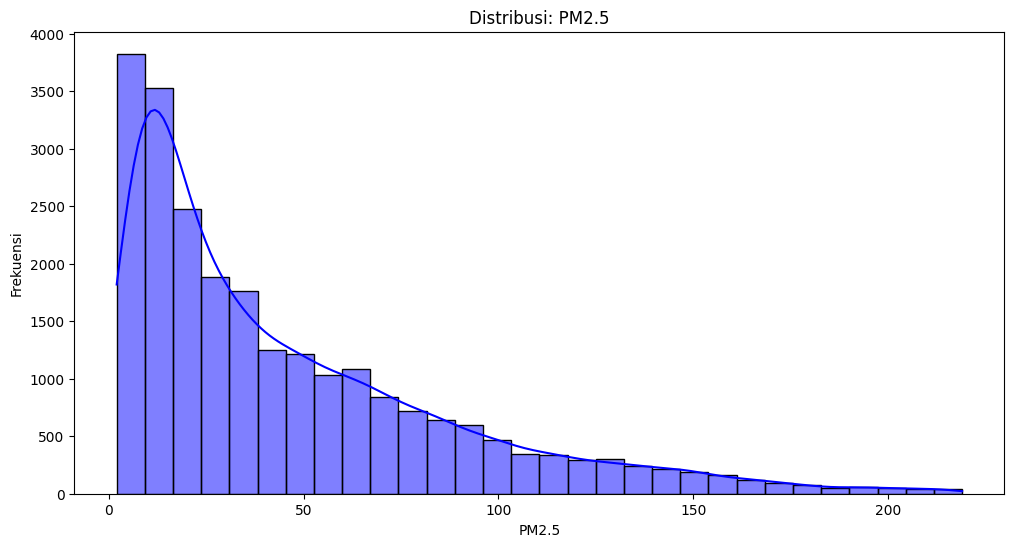

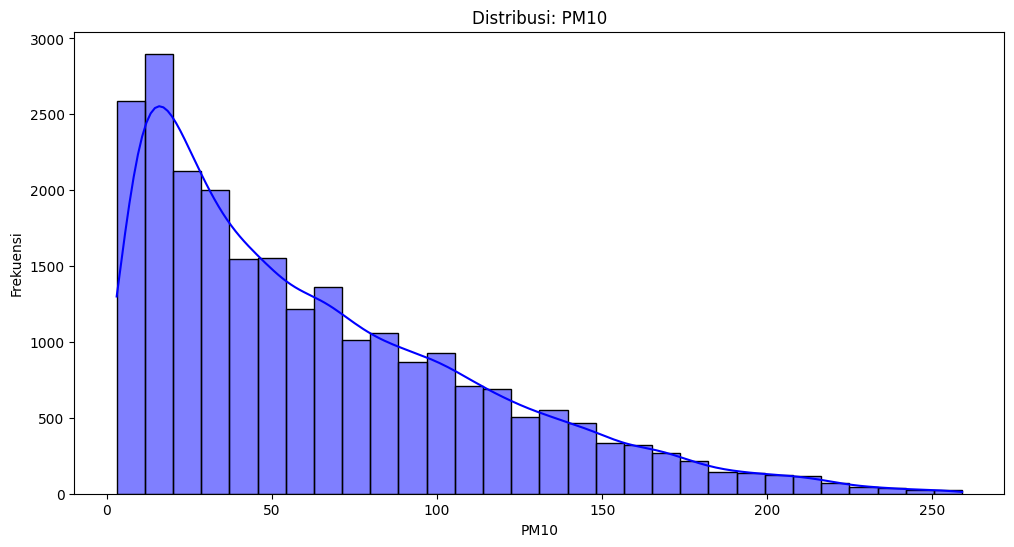

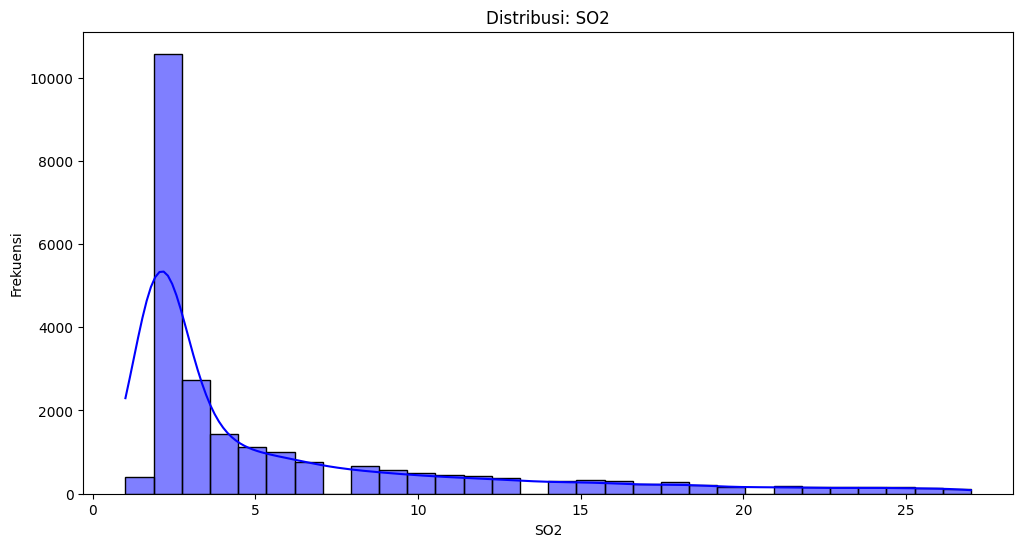

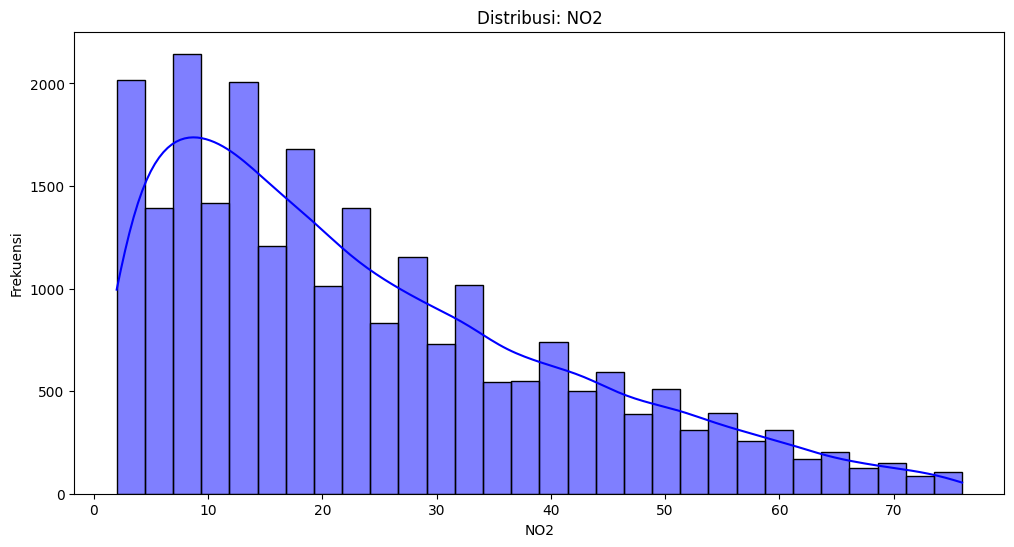

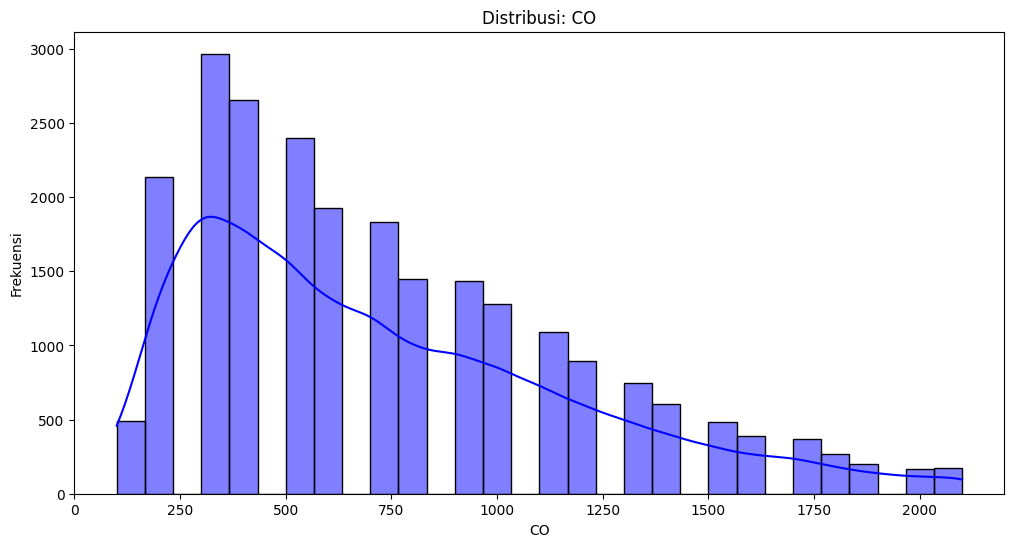

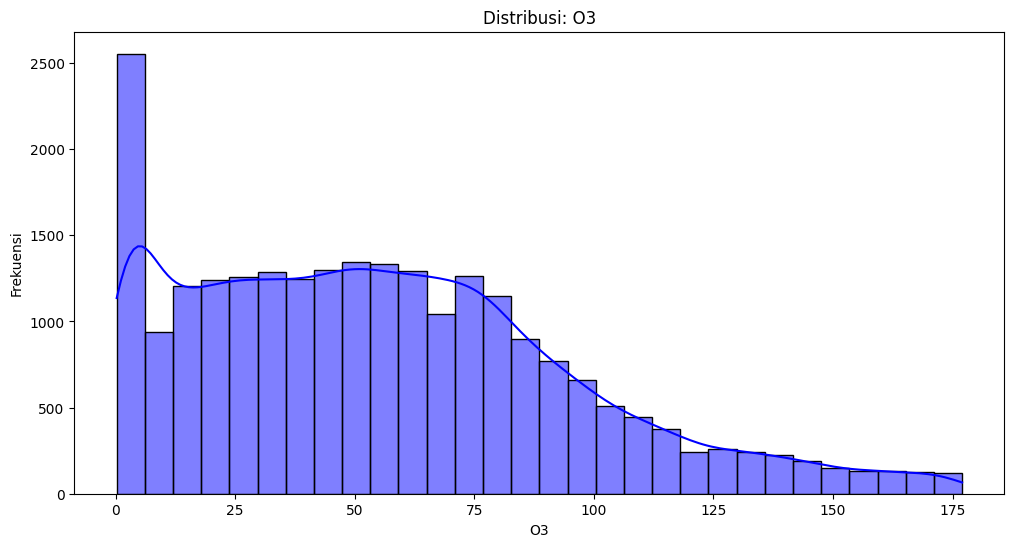

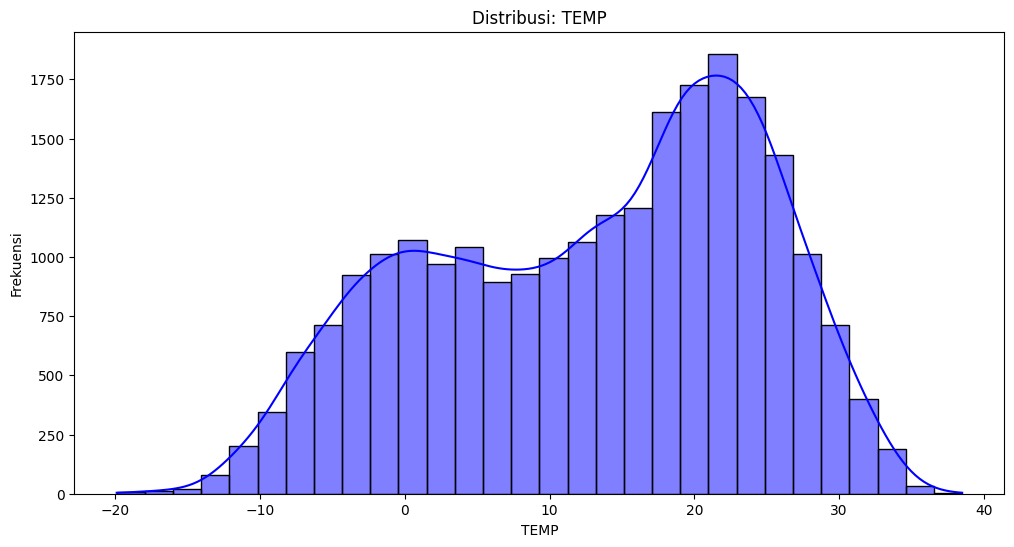

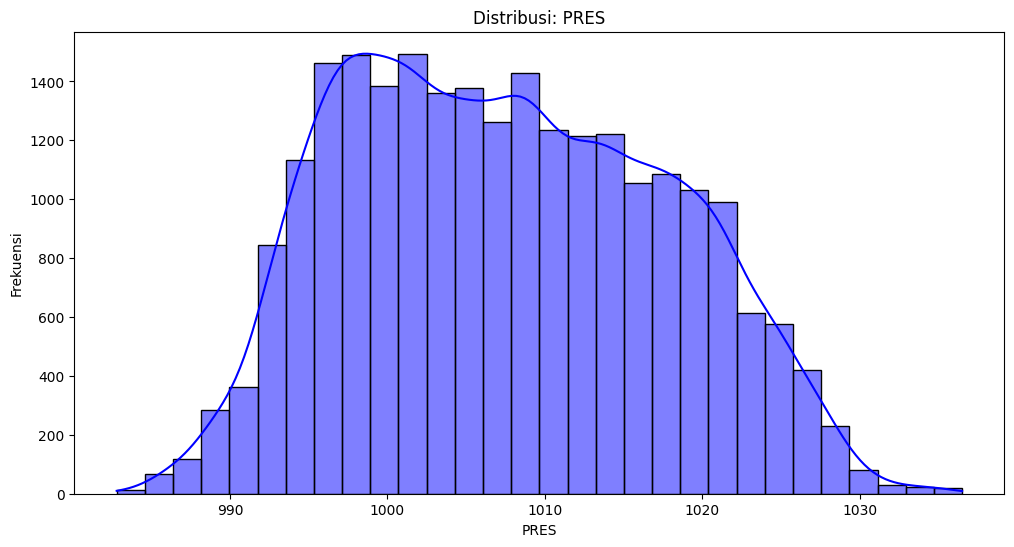

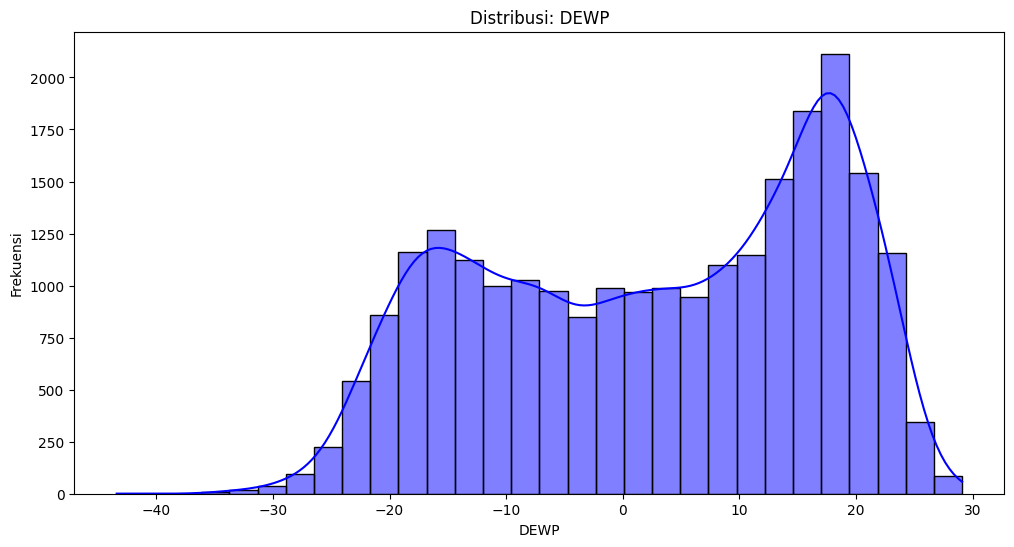

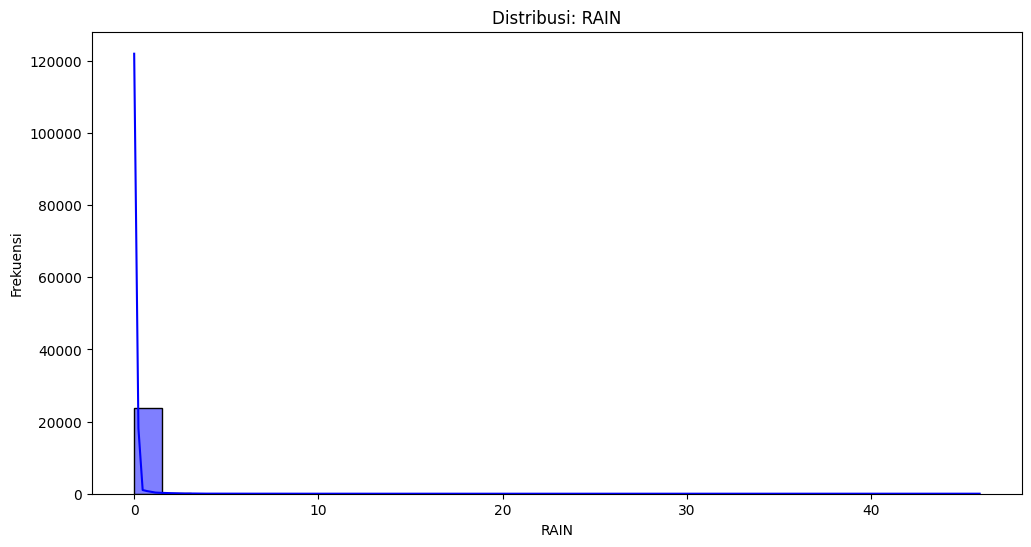

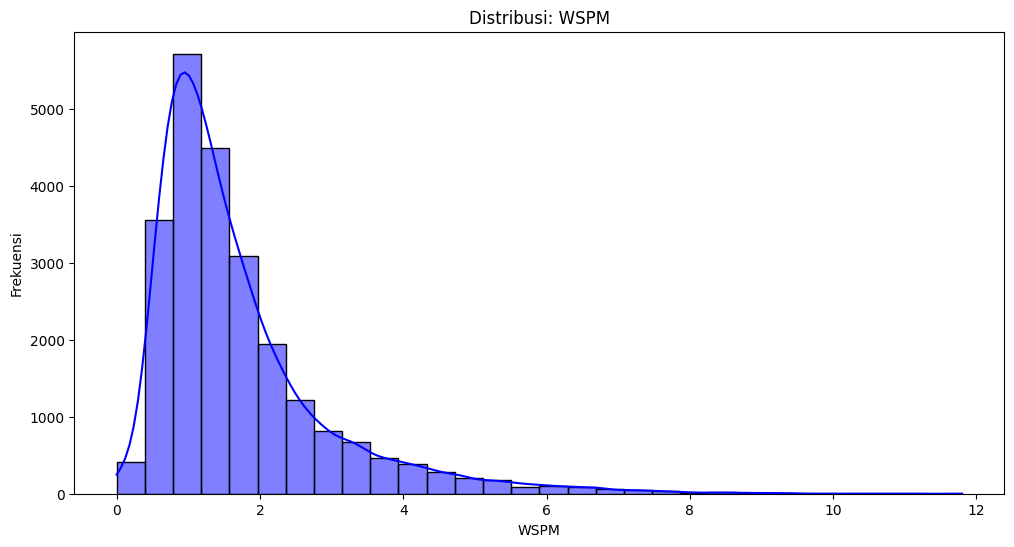

In [13]:
numerical_columns = huaioru_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(huairou_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

**Insight:**
- ```PM(2.5)```: Distribusi Miring ke Kanan, Pola ini menunjukkan bahwa konsentrasi partikel halus di udara umumnya dalam batas aman, tetapi terdapat periode di mana jumlahnya meningkat tajam. Partikel halus ini sangat berbahaya karena dapat masuk ke dalam sistem pernapasan manusia dan sering kali meningkat akibat pembakaran bahan bakar dan aktivitas industri.
- ```PM(10)```: Distribusi Miring ke Kanan, Data ini mengindikasikan bahwa kualitas udara sebagian besar berada pada kondisi normal, tetapi terdapat hari-hari tertentu dengan tingkat polusi udara yang lebih tinggi. Peningkatan konsentrasi partikel debu kasar ini dapat terjadi akibat aktivitas kendaraan, konstruksi, atau kondisi cuaca seperti angin kencang.
- ```SO2```: Distribusi Sangat Miring ke Kanan, Artinya, sebagian besar nilai SO₂ rendah, tetapi ada beberapa lonjakan sangat tinggi. SO₂ biasanya berasal dari pembakaran batu bara atau aktivitas industri, jadi lonjakan ini bisa terjadi saat ada aktivitas industri yang tinggi dalam periode tertentu.
- ```NO2```: Distribusi Miring ke Kanan, sebagian besar data berada di nilai rendah tetapi ada beberapa nilai yang cukup tinggi. NO₂ sering berasal dari emisi kendaraan dan aktivitas industri, sehingga kemungkinan ada periode di mana aktivitas ini lebih tinggi dan menyebabkan lonjakan kadar NO₂.
- ```CO```: Distribusi Miring ke Kanan, Sebagian besar nilai CO rendah, tetapi ada beberapa lonjakan tinggi, yang mungkin terjadi saat ada aktivitas industri atau transportasi tinggi. Karbon monoksida biasanya berasal dari kendaraan bermotor dan pembakaran bahan bakar, jadi bisa jadi ada waktu tertentu (misalnya jam sibuk) di mana kadarnya meningkat drastis.
- ```O3```: Distribusi Hampir Merata, Sedikit Miring ke Kanan, Artinya, konsentrasi ozon bervariasi tetapi ada beberapa nilai yang lebih tinggi dari biasanya.
- ```TEMP```: Distribusi Bimodal (Dua Puncak), Ini berarti ada dua kelompok utama suhu dalam dataset ini, kemungkinan besar disebabkan oleh perbedaan antara musim panas dan musim dingin. Bisa juga dipengaruhi oleh waktu siang dan malam, di mana suhu lebih tinggi di siang hari dan lebih rendah di malam hari.
- ```PRES```:  Distribusi Hampir Normal (Mirip Gunung - Simetris di Tengahnya), Ini menunjukkan bahwa tekanan udara cenderung stabil dan tidak banyak mengalami perubahan ekstrem. Biasanya, distribusi normal ini menandakan bahwa tekanan udara dalam kondisi wajar tanpa ada kejadian cuaca ekstrem yang sering terjadi.
- ```DEWP```: Distribusi Bimodal (Dua Puncak), Artinya, ada dua kelompok utama dalam data ini. Bisa jadi ada dua musim yang sangat berbeda, misalnya musim kemarau dengan curah hujan rendah dan musim hujan dengan curah hujan tinggi. Kemungkinan juga bisa disebabkan oleh pola hujan yang tidak merata sepanjang tahun.
- ```WSPM```: Distribusi Miring ke Kanan (Right-Skewed), Artinya, sebagian besar data memiliki nilai kecil, tetapi ada beberapa nilai yang sangat tinggi.  Kemungkinan ada beberapa periode di mana polusi udara meningkat tajam, mungkin akibat aktivitas manusia seperti pembakaran bahan bakar atau cuaca tertentu.



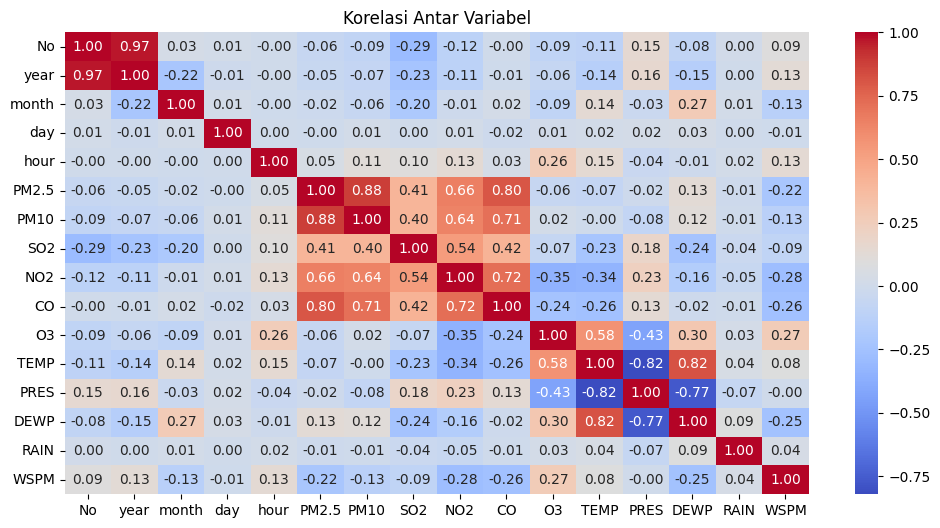

In [14]:
numerical_df = huaioru_df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

**Insight:**

Korelasi antar variabel menunjukkan bahwa PM2.5 dan PM10 memiliki hubungan kuat dengan polutan lain seperti CO dan NO2, yang umumnya berasal dari kendaraan dan industri. Ozon (O3) menunjukkan pola kebalikan dengan NO2 dan CO, karena terbentuk melalui reaksi fotokimia di udara. Dengan memahami hubungan ini, strategi pengendalian polusi dapat difokuskan pada pengurangan emisi dan pemanfaatan faktor lingkungan untuk meningkatkan kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kondisi materi partikulat PM(2.5) dan PM(10) yang dimonitoring pada stasiun Huairou tiap tahun.

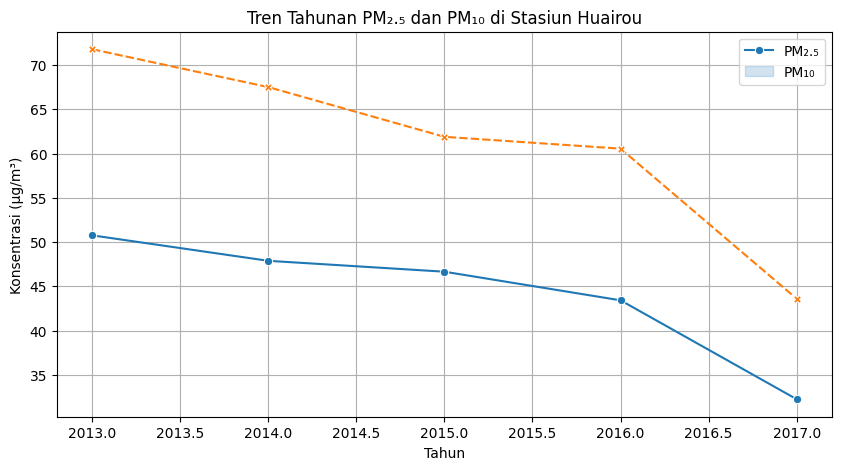

In [15]:
yearly_avg = huairou_df.groupby('year')[['PM2.5', 'PM10']].mean()

# Plot grafik tren tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_avg, markers=True)
plt.title("Tren Tahunan PM₂.₅ dan PM₁₀ di Stasiun Huairou")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.legend(["PM₂.₅", "PM₁₀"])
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah jam sibuk mempengaruhi polusi udara dibanding tengah malam

<ipython-input-16-04b2696a1c48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huaioru_df['time_category'] = 'Other'


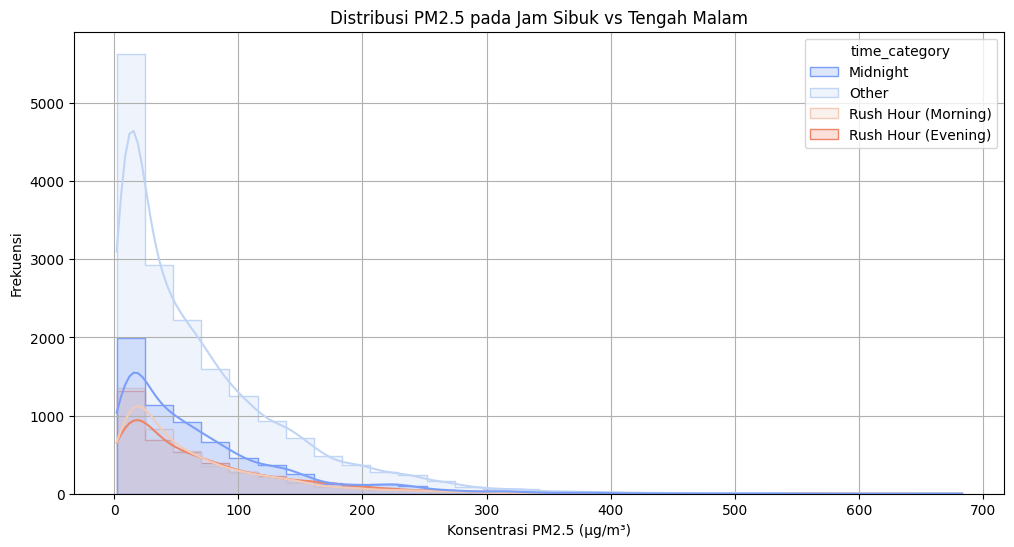

In [16]:
rush_hour_morning = huaioru_df[(huaioru_df['hour'] >= 7) & (huaioru_df['hour'] <= 9)]
rush_hour_evening = huaioru_df[(huaioru_df['hour'] >= 17) & (huaioru_df['hour']) <=19]
midnight = huaioru_df[(huaioru_df['hour'] >= 0) & (huaioru_df['hour']) <=4]

huaioru_df['time_category'] = 'Other'
huaioru_df.loc[huaioru_df['hour'].between(7, 9), 'time_category'] = 'Rush Hour (Morning)'
huaioru_df.loc[huaioru_df['hour'].between(17, 19), 'time_category'] = 'Rush Hour (Evening)'
huaioru_df.loc[huaioru_df['hour'].between(0, 4), 'time_category'] = 'Midnight'

plt.figure(figsize=(12, 6))
sns.histplot(data=huaioru_df, x='PM2.5', hue='time_category', bins=30, kde=True, palette='coolwarm', element='step', common_norm=False)
plt.title('Distribusi PM2.5 pada Jam Sibuk vs Tengah Malam')
plt.xlabel('Konsentrasi PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

<ipython-input-17-4564266de3f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huaioru_df['time_category'] = 'Other'


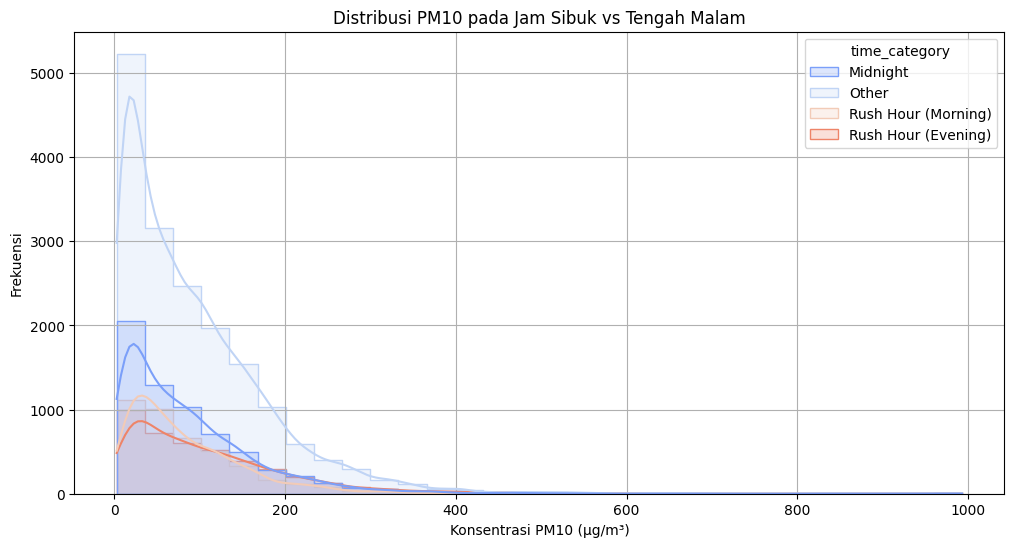

In [17]:
rush_hour_morning = huaioru_df[(huaioru_df['hour'] >= 7) & (huaioru_df['hour'] <= 9)]
rush_hour_evening = huaioru_df[(huaioru_df['hour'] >= 17) & (huaioru_df['hour']) <=19]
midnight = huaioru_df[(huaioru_df['hour'] >= 0) & (huaioru_df['hour']) <=4]

huaioru_df['time_category'] = 'Other'
huaioru_df.loc[huaioru_df['hour'].between(7, 9), 'time_category'] = 'Rush Hour (Morning)'
huaioru_df.loc[huaioru_df['hour'].between(17, 19), 'time_category'] = 'Rush Hour (Evening)'
huaioru_df.loc[huaioru_df['hour'].between(0, 4), 'time_category'] = 'Midnight'

plt.figure(figsize=(12, 6))
sns.histplot(data=huaioru_df, x='PM10', hue='time_category', bins=30, kde=True, palette='coolwarm', element='step', common_norm=False)
plt.title('Distribusi PM10 pada Jam Sibuk vs Tengah Malam')
plt.xlabel('Konsentrasi PM10 (µg/m³)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

## Conclusion

- Bagaimana kondisi materi partikulat PM(2.5) dan PM(10) yang dimonitoring pada stasiun Huairou?

Kondisi materi partikulat yang dimonitoring pada stasiun Huairou dalam rentang 1 Maret 2013 hingga 28 Februari 2017 mengalami penurunan yang cukup baik. Artinya pemerintah Beijing cukup baik dalam melakukan mengurangi polusi udara.

- Apakah jam sibuk mempengaruhi polusi udara dibanding tengah malam?

Jam sibuk tidak selalu meningkatkan polusi udara secara signifikan, karena distribusi Midnight dan Other masih cukup tinggi. Sumber polusi lain selain kendaraan mungkin lebih dominan, seperti aktivitas industri atau kondisi cuaca yang menyebabkan akumulasi polutan. Sebagian besar polusi udara berada di level rendah, tetapi ada outlier tinggi yang bisa disebabkan oleh faktor ekstrem.